In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

### Getting Keypoints

In [2]:
marker = mp.solutions.holistic
lines = mp.solutions.drawing_utils

In [3]:
def object_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable =True
    image =cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    landmarks = [results.pose_landmarks, results.left_hand_landmarks, results.right_hand_landmarks]
    connections = [marker.POSE_CONNECTIONS, marker.HAND_CONNECTIONS, marker.HAND_CONNECTIONS]


    for i, landmark_type in enumerate(landmarks):
        lines.draw_landmarks(image, landmark_type, connections[i])

In [5]:
def landmark_style(image, results):
    landmarks = [results.pose_landmarks, results.left_hand_landmarks, results.right_hand_landmarks]
    connections = [marker.POSE_CONNECTIONS, marker.HAND_CONNECTIONS, marker.HAND_CONNECTIONS]
    drawing_specs = [
        (lines.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
         lines.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)),
        (lines.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
         lines.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)),
        (lines.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
         lines.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
    ]

    for i, landmark_type in enumerate(landmarks):
        lines.draw_landmarks(
            image, 
            landmark_type, 
            connections[i],
            landmark_drawing_spec=drawing_specs[i][0],
            connection_drawing_spec=drawing_specs[i][1]
        )

# Assuming mp

In [6]:
stream = cv2.VideoCapture(0)
with marker.Holistic(min_detection_confidence=0.6, min_tracking_confidence =0.6) as holistic:
    while stream.isOpened():
        ret, frame = stream.read()
        image, results = object_detection(frame, holistic)
        print(results)
        landmark_style(image, results)
        cv2.imshow("feed", image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    stream.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

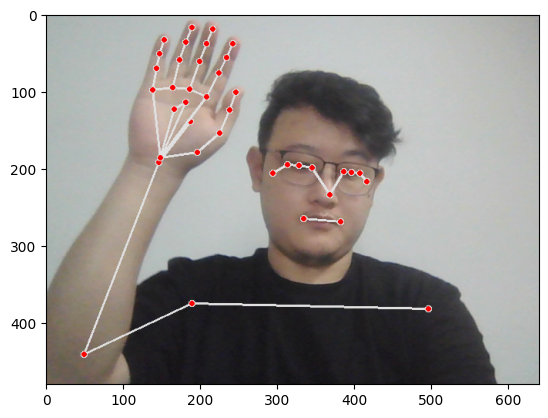

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### 3. Extracting the Keypoint Values

In [9]:
results.left_hand_landmarks

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)


In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [12]:
extract_keypoints(results)

array([ 5.76107264e-01,  4.89520490e-01, -9.86372173e-01,  9.99871016e-01,
        6.03580415e-01,  4.26500261e-01, -9.17052865e-01,  9.99788940e-01,
        6.18882954e-01,  4.28390503e-01, -9.16935742e-01,  9.99693751e-01,
        6.36402488e-01,  4.30984288e-01, -9.17253494e-01,  9.99736667e-01,
        5.39113879e-01,  4.14813846e-01, -9.05386090e-01,  9.99807537e-01,
        5.13178706e-01,  4.09335434e-01, -9.04611468e-01,  9.99790251e-01,
        4.89865214e-01,  4.06411260e-01, -9.04848397e-01,  9.99860525e-01,
        6.51257575e-01,  4.54061210e-01, -4.57975447e-01,  9.99732554e-01,
        4.60696787e-01,  4.30612117e-01, -3.97494733e-01,  9.99883354e-01,
        5.97912848e-01,  5.60493350e-01, -8.26354623e-01,  9.99877691e-01,
        5.21943092e-01,  5.52964807e-01, -8.07433724e-01,  9.99897718e-01,
        7.75191009e-01,  7.97708631e-01, -2.31115341e-01,  9.98495936e-01,
        2.95919508e-01,  7.83107519e-01, -2.74007857e-01,  9.99319077e-01,
        8.79584789e-01,  

In [13]:
extract_keypoints(results).shape

(258,)

In [14]:
result_test = extract_keypoints(results)

In [15]:
np.array(result_test).shape

(258,)

In [16]:
np.save('0', result_test)

In [17]:
sample =np.load('0.npy')


### 3. Folder for collecting the sample

In [18]:
print(os.path)

<module 'ntpath' (frozen)>


In [19]:
# Path for exported data, numpy arrays
path = './Data' 
# os.mkdir(path)

# wordss that we try to detect
words = np.array(['Namaste', 'Hello', 'Greate', 'Bye', 'Thank You'])

# Thirty videos worth of data
videos = 30

# Videos are going to be 30 frames in length
frames_per_video = 30
#60

# Folder start
start_folder = 0

In [20]:
words

array(['Namaste', 'Hello', 'Greate', 'Bye', 'Thank You'], dtype='<U9')

In [21]:
for word in words: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, words))).astype(int))
    for sequence in range(0,videos):
        try: 
            os.makedirs(os.path.join(path, word, str(sequence)))
        except:
            pass

### 5 Collecting the key point for the training and testing set

In [22]:
stream = cv2.VideoCapture(0)
# Set mediapipe model 
with marker.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for word in words:
        for sequence in range(start_folder, start_folder+videos):
            for frame_num in range(frames_per_video):
                ret, frame = stream.read()
                image, results = object_detection(frame, holistic)
                landmark_style(image, results)
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, (f"Collecting frames for {word} Video Number {sequence}"), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(100)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(word, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(path, word, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    stream.release()
    cv2.destroyAllWindows()

In [24]:
stream.release()
cv2.destroyAllWindows()

### 6 Data Preprocessing and training

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label: num for num, label in enumerate(words)}

In [48]:
label_map

{'Namaste': 0, 'Hello': 1, 'Greate': 2, 'Bye': 3, 'Thank You': 4}

In [49]:
sequences, labels = [], []
for word in words:
    for sequence in range(videos):
        window = []
        for frame_num in range(frames_per_video):
            res = np.load(os.path.join(path, word, str(sequence), f"{frame_num}.npy"))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[word])

In [50]:
np.array(sequences).shape

(150, 30, 258)

In [51]:
np.array(labels).shape

(150,)

In [52]:
X = np.array(sequences)

In [54]:
X.shape

(150, 30, 258)

In [55]:
y = to_categorical(labels).astype(int)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [38]:
X_train.shape

(142, 30, 258)

In [39]:
X_test.shape

(8, 30, 258)

In [40]:
y_train.shape

(142, 5)

In [41]:
y_test.shape

(8, 5)

<h2> LSTM</h2>

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [43]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [57]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(words.shape[0], activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - categorical_accuracy: 0.1911 - loss: 1.9532
Epoch 2/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.3668 - loss: 1.4968
Epoch 3/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3391 - loss: 1.4354
Epoch 4/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.2827 - loss: 1.3293
Epoch 5/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.4315 - loss: 1.1600
Epoch 6/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.4287 - loss: 1.1013
Epoch 7/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.4399 - loss: 1.1821
Epoch 8/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3850 - loss: 1.3165
Epoch 9/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.4522 - loss: 1.0583
Epoch 10/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.4662 - loss: 1.0789
Epoch 11/2000
5/5 ━━━━━━━━━━━

In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 64)              │          82,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 711,953 (2.72 MB)

 Trainable params: 237,317 (927.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 474,636 (1.81 MB)

In [60]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


In [61]:
words[np.argmax(res[1])]

'Hello'

In [62]:
words[np.argmax(y_test[1])]

'Hello'

# Evaluations

In [63]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [64]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [65]:
yhat

array([[1.0000000e+00, 9.4106968e-17, 3.5447080e-18, 1.5006668e-17,
        9.9399912e-11],
       [5.8614153e-22, 1.0000000e+00, 0.0000000e+00, 1.3053511e-15,
        0.0000000e+00],
       [4.6006664e-19, 1.0000000e+00, 0.0000000e+00, 3.1166181e-09,
        2.7944919e-35],
       [4.9159976e-08, 3.2812604e-17, 3.5679849e-12, 2.5006069e-17,
        1.0000000e+00],
       [4.3587086e-30, 3.0280606e-10, 7.2584437e-17, 1.0000000e+00,
        4.6022500e-25],
       [1.3460070e-22, 1.0000000e+00, 8.3962141e-15, 9.6147938e-13,
        6.2512496e-33],
       [9.5494961e-08, 2.0371798e-16, 4.7753669e-11, 3.0538211e-16,
        9.9999988e-01],
       [5.1155888e-07, 6.5285323e-15, 1.9395821e-09, 1.4072249e-14,
        9.9999952e-01]], dtype=float32)

In [66]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [67]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 1]],

       [[5, 0],
        [0, 3]],

       [[7, 0],
        [0, 1]],

       [[5, 0],
        [0, 3]]], dtype=int64)

In [68]:
accuracy_score(ytrue, yhat)

1.0

# real time Evalution

In [87]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, words, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[1], -1)
        cv2.putText(output_frame, words[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

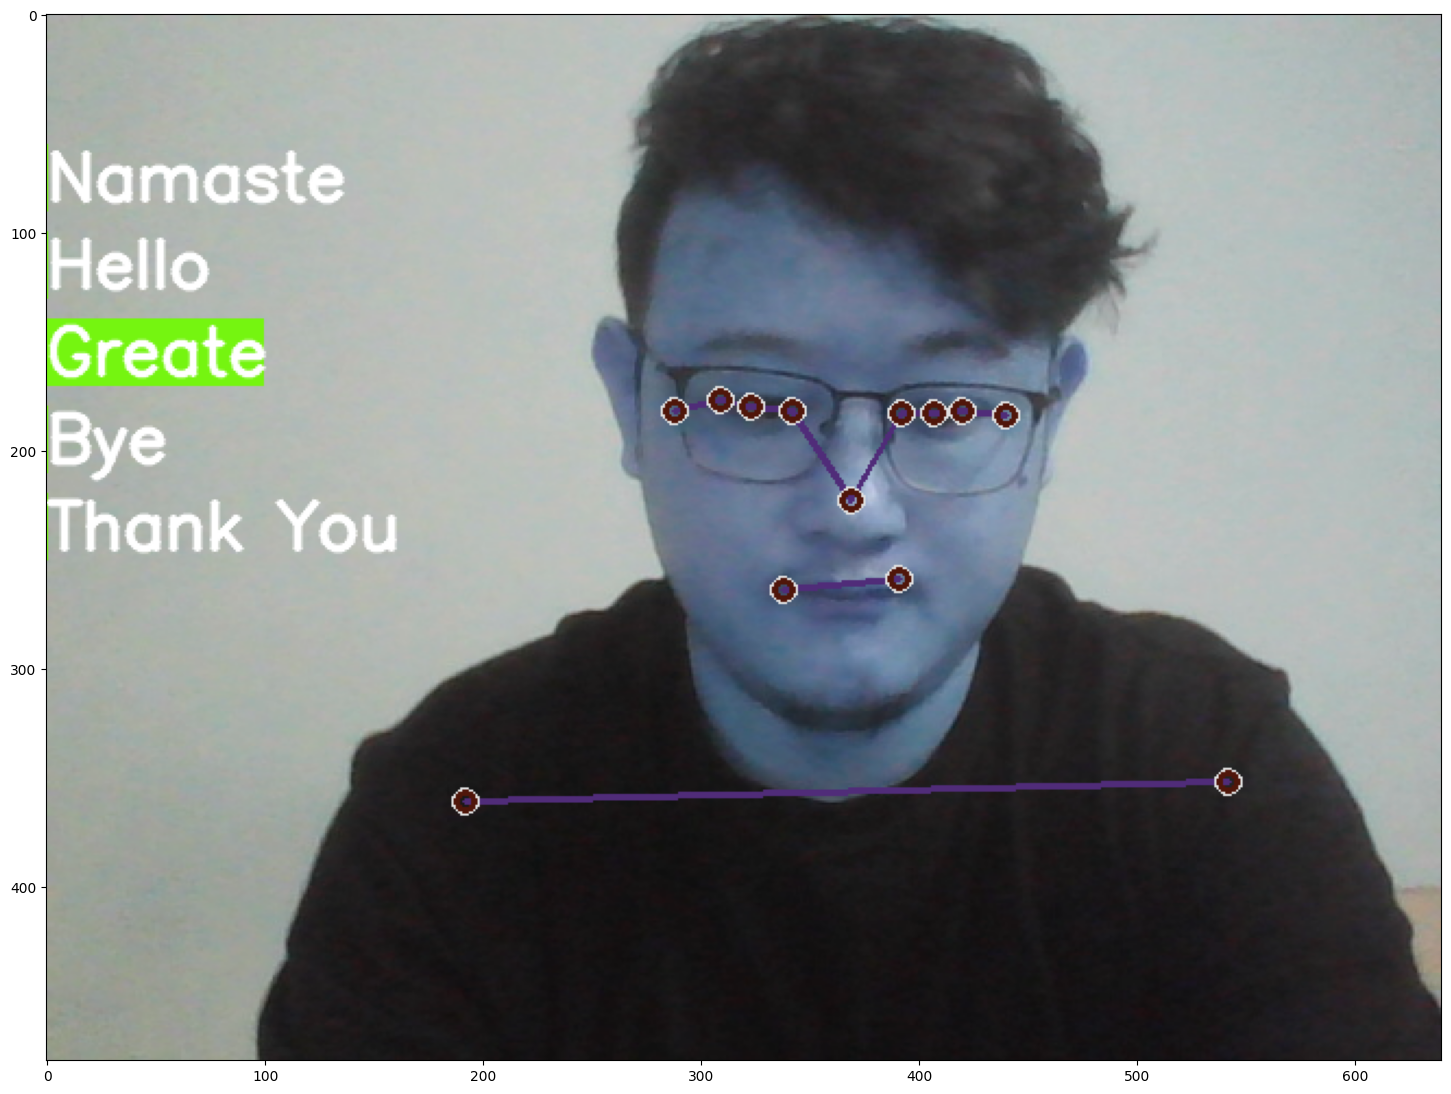

In [88]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, words, image, colors))

In [91]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with marker.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = object_detection(frame, holistic)
        print(results)
        landmark_style(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(words[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
            # 3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 
                        
                        if len(sentence) > 0: 
                            if words[np.argmax(res)] != sentence[-1]:
                                sentence.append(words[np.argmax(res)])
                        else:
                            sentence.append(words[np.argmax(res)])
    
            if len(sentence) > 5: 
                    sentence = sentence[-5:]

            image = prob_viz(res, words, image, colors)
            
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [90]:
cap.release()
cv2.destroyAllWindows()